# XSQUALITY: Cross section quality

In [1]:
import sys
sys.path.append('../')

from miquants_demo.data_collection.PriceLoader import load_stock_data,load_index_data
from miquants_demo.data_collection.UniverseLoader import get_vn30_list
from miquants_demo.selection.XSQUALITY import XSQUALITY
from miquants_demo.utils.metrics import calc_performance_metrics_subset,calc_sharpe_by_year


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empyrical import stats
import seaborn as sns

In [2]:
help(XSQUALITY)

Help on class XSQUALITY in module miquants_demo.selection.XSQUALITY:

class XSQUALITY(builtins.object)
 |  XSQUALITY(stock_list, data_folder)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, stock_list, data_folder)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  calc_beta(self)
 |  
 |  calc_quality(self)
 |  
 |  get_quality_data(self)
 |  
 |  get_quality_port(self, test_year=['2020', '2021', '2022'], xsquality_type='winner', portfolio_num=5)
 |  
 |  get_quality_rank(self)
 |  
 |  run_backtest(self, quality_port, time_delay=15, transaction_cost=0.001, optimizer=None)
 |  
 |  run_quality(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## VN30

In [3]:
vn30 = get_vn30_list()
data_folder ='quality_data/'

In [4]:
my_quality = XSQUALITY(vn30,data_folder)

In [5]:
my_quality.run_quality()

In [11]:
winner = my_quality.get_quality_port(xsquality_type='winner',test_year=['2020','2021', '2022'],portfolio_num=6)
winner

{'2020Q1': ['MWG', 'CTG', 'POW', 'TPB', 'VHM', 'VNM'],
 '2020Q2': ['SSI', 'HDB', 'PLX', 'SAB', 'VNM', 'FPT'],
 '2020Q3': ['PDR', 'NVL', 'PLX', 'VIB', 'SSI', 'HPG'],
 '2020Q4': ['POW', 'BCM', 'PDR', 'GVR', 'CTG', 'VRE'],
 '2021Q1': ['CTG', 'VCB', 'HPG', 'TCB', 'BVH', 'BID'],
 '2021Q2': ['HPG', 'BID', 'PLX', 'VPB', 'TCB', 'GVR'],
 '2021Q3': ['HPG', 'VHM', 'GVR', 'PDR', 'MSN', 'TCB'],
 '2021Q4': ['MSN', 'PDR', 'HPG', 'SSI', 'VJC', 'VHM'],
 '2022Q1': ['VPB', 'VCB', 'MBB', 'ACB', 'HPG', 'GAS'],
 '2022Q2': ['GAS', 'SAB', 'BCM', 'ACB', 'BID', 'VRE'],
 '2022Q3': ['VRE', 'STB', 'ACB', 'HDB', 'MBB', 'SAB'],
 '2022Q4': ['STB', 'VRE', 'VCB', 'VIB', 'FPT', 'PLX']}

In [12]:
loser = my_quality.get_quality_port(xsquality_type='loser',test_year=['2020','2021', '2022'],portfolio_num=6)
loser

{'2020Q1': ['SAB', 'BID', 'SSI', 'VJC', 'VIB', 'PLX'],
 '2020Q2': ['BID', 'VCB', 'STB', 'MSN', 'GAS', 'ACB'],
 '2020Q3': ['VPB', 'VCB', 'ACB', 'VHM', 'POW', 'GAS'],
 '2020Q4': ['VNM', 'MSN', 'SSI', 'NVL', 'HDB', 'GAS'],
 '2021Q1': ['VNM', 'VHM', 'VIC', 'GAS', 'MSN', 'FPT'],
 '2021Q2': ['VCB', 'MWG', 'VJC', 'VRE', 'MSN', 'GAS'],
 '2021Q3': ['CTG', 'PLX', 'HDB', 'VIB', 'SAB', 'VRE'],
 '2021Q4': ['VIC', 'VPB', 'GAS', 'VRE', 'VNM', 'POW'],
 '2022Q1': ['GVR', 'PLX', 'VHM', 'VRE', 'VNM', 'TPB'],
 '2022Q2': ['VIC', 'VNM', 'BVH', 'MWG', 'HPG', 'PLX'],
 '2022Q3': ['GVR', 'VPB', 'TPB', 'PLX', 'POW', 'HPG'],
 '2022Q4': ['SSI', 'VJC', 'TCB', 'VNM', 'HPG', 'PDR']}

In [15]:
winner_rets = my_quality.run_backtest(winner)

['MWG', 'CTG', 'POW', 'TPB', 'VHM', 'VNM']
Train 2019-05-01 00:00:00 2020-04-15 00:00:00
2020 2
Test 2020-04-16 2020-07-16
---------------***--------------
['SSI', 'HDB', 'PLX', 'SAB', 'VNM', 'FPT']
Train 2019-07-31 00:00:00 2020-07-15 00:00:00
2020 3
Test 2020-07-16 2020-10-16
---------------***--------------
['PDR', 'NVL', 'PLX', 'VIB', 'SSI', 'HPG']
Train 2019-10-31 00:00:00 2020-10-15 00:00:00
2020 4
Test 2020-10-16 2021-01-16
---------------***--------------
['POW', 'BCM', 'PDR', 'GVR', 'CTG', 'VRE']
Train 2020-01-31 00:00:00 2021-01-15 00:00:00
2020 5
Test 2021-01-16 2021-04-16
---------------***--------------
['CTG', 'VCB', 'HPG', 'TCB', 'BVH', 'BID']
Train 2020-04-30 00:00:00 2021-04-15 00:00:00
2021 2
Test 2021-04-16 2021-07-16
---------------***--------------
['HPG', 'BID', 'PLX', 'VPB', 'TCB', 'GVR']
Train 2020-07-30 00:00:00 2021-07-15 00:00:00
2021 3
Test 2021-07-16 2021-10-16
---------------***--------------
['HPG', 'VHM', 'GVR', 'PDR', 'MSN', 'TCB']
Train 2020-10-30 00:0

In [16]:
winner_rets

,xsquality
2020-04-17,0.000000
2020-04-20,0.008632
2020-04-21,-0.036321
2020-04-22,0.011796
2020-04-23,0.003632
...,...
2023-02-24,-0.012239
2023-02-27,-0.018242
2023-02-28,0.010005
2023-03-01,0.021805


In [17]:
loser_rets = my_quality.run_backtest(loser)

['SAB', 'BID', 'SSI', 'VJC', 'VIB', 'PLX']
Train 2019-05-01 00:00:00 2020-04-15 00:00:00
2020 2
Test 2020-04-16 2020-07-16
---------------***--------------
['BID', 'VCB', 'STB', 'MSN', 'GAS', 'ACB']
Train 2019-07-31 00:00:00 2020-07-15 00:00:00
2020 3
Test 2020-07-16 2020-10-16
---------------***--------------
['VPB', 'VCB', 'ACB', 'VHM', 'POW', 'GAS']
Train 2019-10-31 00:00:00 2020-10-15 00:00:00
2020 4
Test 2020-10-16 2021-01-16
---------------***--------------
['VNM', 'MSN', 'SSI', 'NVL', 'HDB', 'GAS']
Train 2020-01-31 00:00:00 2021-01-15 00:00:00
2020 5
Test 2021-01-16 2021-04-16
---------------***--------------
['VNM', 'VHM', 'VIC', 'GAS', 'MSN', 'FPT']
Train 2020-04-30 00:00:00 2021-04-15 00:00:00
2021 2
Test 2021-04-16 2021-07-16
---------------***--------------
['VCB', 'MWG', 'VJC', 'VRE', 'MSN', 'GAS']
Train 2020-07-30 00:00:00 2021-07-15 00:00:00
2021 3
Test 2021-07-16 2021-10-16
---------------***--------------
['CTG', 'PLX', 'HDB', 'VIB', 'SAB', 'VRE']
Train 2020-10-30 00:0

In [19]:
loser_rets

,xsquality
2020-04-17,0.000000
2020-04-20,0.021255
2020-04-21,-0.047636
2020-04-22,0.014742
2020-04-23,0.012770
...,...
2023-02-24,-0.026470
2023-02-27,-0.014146
2023-02-28,-0.002347
2023-03-01,0.029465


In [18]:
vnindex = load_index_data('VNINDEX',(winner_rets.index[0]).strftime("%Y-%m-%d"),winner_rets.index[-1].strftime("%Y-%m-%d"))
vnindex = vnindex['close'].pct_change()
vnindex.index = pd.to_datetime(vnindex.index)

In [20]:
vnindex

tradingDate
2020-04-17         NaN
2020-04-20    0.006801
2020-04-21   -0.035385
2020-04-22    0.002712
2020-04-23    0.006490
                ...   
2023-02-24   -0.013382
2023-02-27   -0.017613
2023-02-28    0.003359
2023-03-01    0.015488
2023-03-02   -0.005199
Name: close, Length: 719, dtype: float64

In [21]:
compare= pd.DataFrame({'winner':winner_rets['xsquality'],'loser':loser_rets['xsquality'],'vnindex':vnindex})
compare.fillna(0,inplace=True)
compare

,winner,loser,vnindex
2020-04-17,0.000000,0.000000,0.000000
2020-04-20,0.008632,0.021255,0.006801
2020-04-21,-0.036321,-0.047636,-0.035385
2020-04-22,0.011796,0.014742,0.002712
2020-04-23,0.003632,0.012770,0.006490
...,...,...,...
2023-02-24,-0.012239,-0.026470,-0.013382
2023-02-27,-0.018242,-0.014146,-0.017613
2023-02-28,0.010005,-0.002347,0.003359
2023-03-01,0.021805,0.029465,0.015488


[]

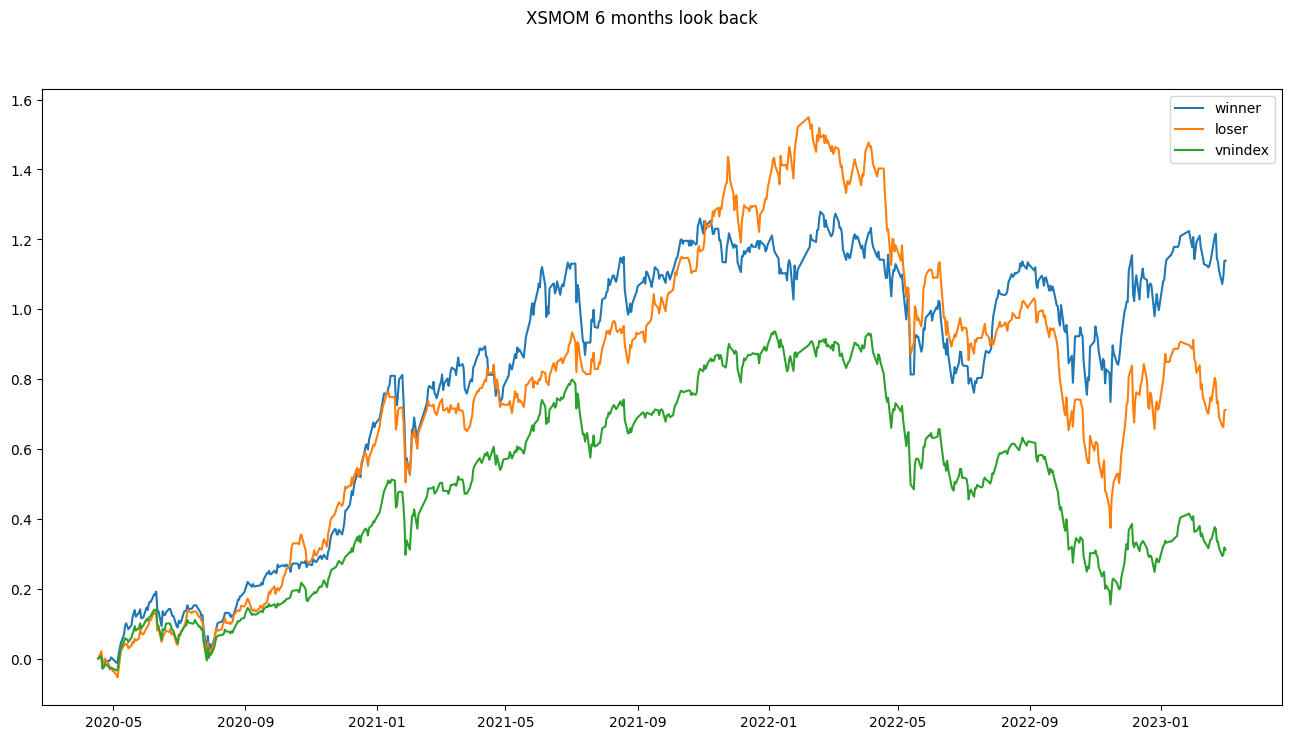

In [22]:
fig,ax=plt.subplots(1,1,figsize=(16,8))
fig.suptitle('XSMOM vs. VNINDEX')
ax.plot(stats.cum_returns(compare.winner),label='winner')
ax.plot(stats.cum_returns(compare.loser),label='loser')
ax.plot(stats.cum_returns(compare.vnindex),label='vnindex')
fig.suptitle('XSMOM 6 months look back')
plt.legend()
plt.plot()

In [23]:
xxx = calc_performance_metrics_subset(compare)
metrics = pd.DataFrame({'Annual return':xxx['annual_return'],'Annual volatility':xxx['annual_volatility'],'Downside risk':xxx['downside_risk'],'Max drawdown':xxx['max_drawdown'].to_list()})
metrics = metrics.applymap("{0:.2%}".format)
metrics.T

,winner,loser,vnindex
Annual return,30.53%,20.72%,9.95%
Annual volatility,26.03%,26.26%,21.87%
Downside risk,18.84%,19.07%,16.63%
Max drawdown,23.89%,46.11%,40.34%


In [24]:
x1 = calc_sharpe_by_year(compare[['winner']].rename(columns={'winner':'captured_returns'}))
x2 = calc_sharpe_by_year(compare[['loser']].rename(columns={'loser':'captured_returns'}))
x3 = calc_sharpe_by_year(compare[['vnindex']].rename(columns={'vnindex':'captured_returns'}))
sharpe_df = pd.DataFrame({'Winner':x1,'Loser':x2,'Vnindex':x3})
sharpe_df[:-1]

,Winner,Loser,Vnindex
sharpe_ratio_2020,3.382987,3.102323,2.650342
sharpe_ratio_2021,1.196271,1.705483,1.567952
sharpe_ratio_2022,-0.154668,-0.881868,-1.493727


In [26]:
import scipy

ts1 = compare['winner']
ts2 =compare['loser']
ts3 = compare['vnindex']

statistics1 = scipy.stats.describe(ts1)
statistics2 = scipy.stats.describe(ts2)
statistics3 = scipy.stats.describe(ts3)

moment_compare = pd.DataFrame(index=['mean','std','skewness','kurtosis'],columns=['Winner','Loser','Vnindex'])
moment_compare.loc['mean',:]=round(statistics1.mean,4),round(statistics2.mean,4),round(statistics3.mean,4)
moment_compare.loc['std',:]=round(np.sqrt(statistics1.variance),4),round(np.sqrt(statistics2.variance),4),round(np.sqrt(statistics3.variance),4)
moment_compare.loc['skewness',:]=round(statistics1.skewness,4),round(statistics2.skewness,4),round(statistics3.skewness,4)
moment_compare.loc['kurtosis',:]=round(statistics1.kurtosis,4),round(statistics2.kurtosis,4),round(statistics3.kurtosis,4)
moment_compare

,Winner,Loser,Vnindex
mean,0.0012,0.0009,0.0005
std,0.0164,0.0165,0.0138
skewness,-0.6102,-0.5358,-0.8372
kurtosis,2.2263,2.1355,2.7226


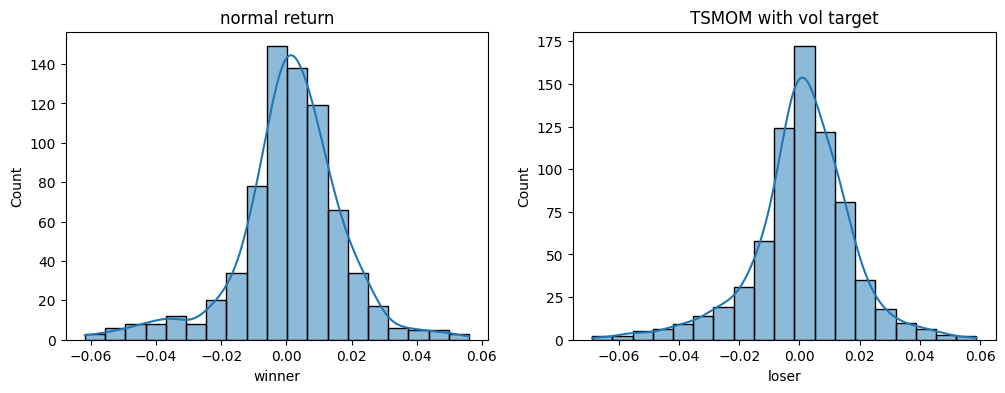

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
bins = 19
sns.histplot(ts1,bins=bins,kde=True,ax=ax1)
ax1.title.set_text('normal return')

sns.histplot(ts2,bins=bins,kde=True,ax=ax2)
ax2.title.set_text('TSMOM with vol target')

plt.show()

## VN100

In [28]:
stock_list = ['AAA','ACB', 'AGG','ANV','ASM',
              'BCG','BCM','BID','BMP', 'BVH',
              'BWE', 'CII','CMG','CRE','CTD',
              'CTG','CTR', 'DBC','DCM','DGC',
              'DGW','DHC','DIG', 'DPM','DXG',
              'DXS','EIB','FPT', 'FRT','GAS', 
              'GEG','GEX','GMD','GVR','HBC',
              'HCM','HDB','HDG','HNG', 'HPG', 
              'HPX', 'HSG','HT1','IMP','KBC',
              'KDC','KDH','KOS','LPB','MBB',
              'MSB', 'MSN', 'MWG','NKG','NLG',
              'NT2','NVL', 'OCB','PAN','PC1',
              'PDR','PHR', 'PLX','PNJ', 'POW', 
              'PPC','PTB','PVD','PVT', 'REE',
              'SAB', 'SAM', 'SBT','SCR','SCS',
              'SHB','SJS','SSB','SSI', 'STB', 
              'SZC','TCB', 'TCH','TMS','TPB', 
              'VCB','VCG','VCI','VGC','VHC', 
              'VHM','VIB', 'VIC', 'VJC','VND',
              'VNM','VPB','VPI', 'VRE','VSH']

In [29]:
my_quality = XSQUALITY(stock_list,data_folder)
my_quality.run_quality()

In [30]:
winner = my_quality.get_quality_port(xsquality_type='winner',test_year=['2020','2021', '2022'],portfolio_num=6)
loser = my_quality.get_quality_port(xsquality_type='loser',test_year=['2020','2021', '2022'],portfolio_num=6)

In [31]:
winner_rets = my_quality.run_backtest(winner)
loser_rets = my_quality.run_backtest(loser)

['DBC', 'MWG', 'HNG', 'DHC', 'OCB', 'SBT']
Train 2019-05-01 00:00:00 2020-04-15 00:00:00
2020 2
Test 2020-04-16 2020-07-16
---------------***--------------
['DBC', 'CRE', 'SSI', 'HT1', 'HDB', 'SZC']
Train 2019-07-31 00:00:00 2020-07-15 00:00:00
2020 3
Test 2020-07-16 2020-10-16
---------------***--------------
['VCG', 'DBC', 'TCH', 'PDR', 'NVL', 'VND']
Train 2019-10-31 00:00:00 2020-10-15 00:00:00
2020 4
Test 2020-10-16 2021-01-16
---------------***--------------
['POW', 'PPC', 'BCM', 'DHC', 'OCB', 'DIG']
Train 2020-01-31 00:00:00 2021-01-15 00:00:00
2020 5
Test 2021-01-16 2021-04-16
---------------***--------------
['CTG', 'VCB', 'HSG', 'VND', 'PNJ', 'HPG']
Train 2020-04-30 00:00:00 2021-04-15 00:00:00
2021 2
Test 2021-04-16 2021-07-16
---------------***--------------
['HPG', 'BID', 'HT1', 'PLX', 'NKG', 'VPB']
Train 2020-07-30 00:00:00 2021-07-15 00:00:00
2021 3
Test 2021-07-16 2021-10-16
---------------***--------------
['HPG', 'VHM', 'CMG', 'NKG', 'GVR', 'PDR']
Train 2020-10-30 00:0

In [32]:
vnindex = load_index_data('VNINDEX',(winner_rets.index[0]).strftime("%Y-%m-%d"),winner_rets.index[-1].strftime("%Y-%m-%d"))
vnindex = vnindex['close'].pct_change()
vnindex.index = pd.to_datetime(vnindex.index)

In [33]:
compare= pd.DataFrame({'winner':winner_rets['xsquality'],'loser':loser_rets['xsquality'],'vnindex':vnindex})
compare.fillna(0,inplace=True)
compare

,winner,loser,vnindex
2020-04-17,0.000000,0.000000,0.000000
2020-04-20,0.000435,0.020770,0.006801
2020-04-21,-0.033961,-0.040454,-0.035385
2020-04-22,0.013545,-0.003347,0.002712
2020-04-23,-0.002532,0.004926,0.006490
...,...,...,...
2023-02-24,-0.001680,-0.024398,-0.013382
2023-02-27,-0.016114,-0.025520,-0.017613
2023-02-28,0.007112,-0.000227,0.003359
2023-03-01,0.015167,0.037703,0.015488


[]

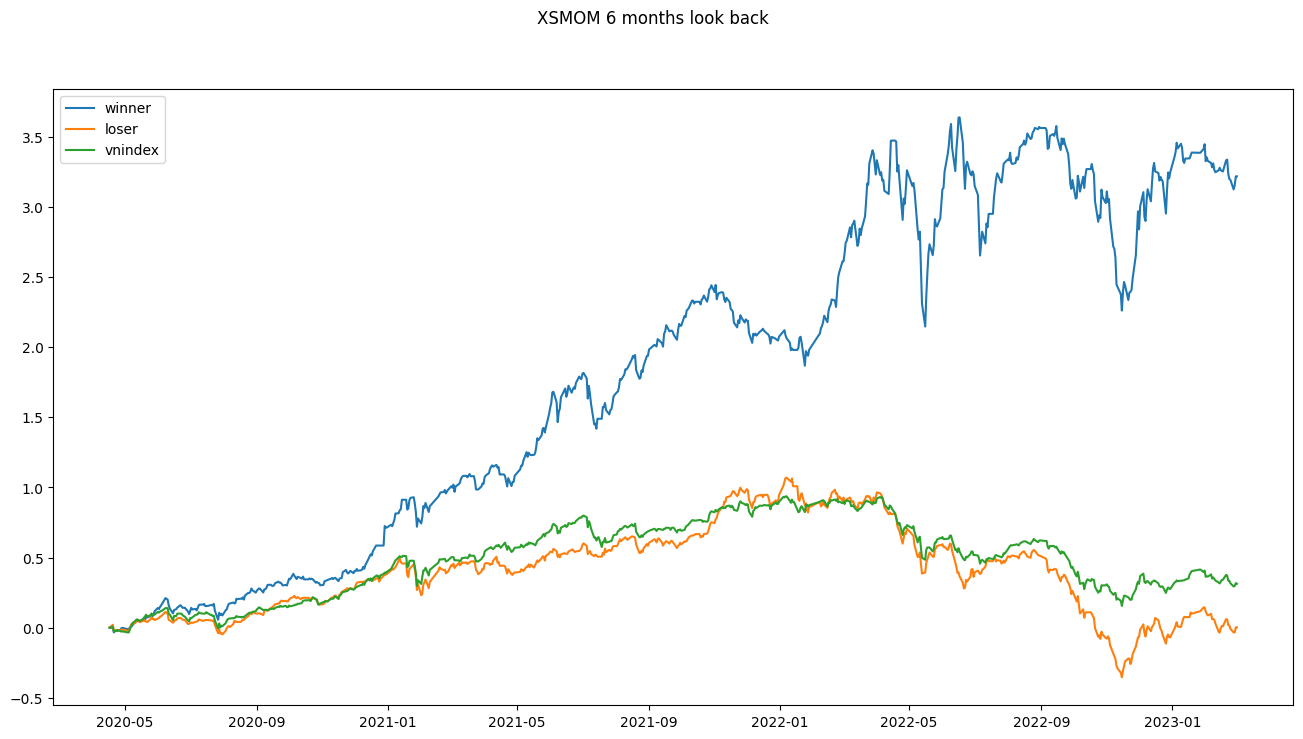

In [34]:
fig,ax=plt.subplots(1,1,figsize=(16,8))
fig.suptitle('XSMOM vs. VNINDEX')
ax.plot(stats.cum_returns(compare.winner),label='winner')
ax.plot(stats.cum_returns(compare.loser),label='loser')
ax.plot(stats.cum_returns(compare.vnindex),label='vnindex')
fig.suptitle('XSMOM 6 months look back')
plt.legend()
plt.plot()

In [35]:
xxx = calc_performance_metrics_subset(compare)
metrics = pd.DataFrame({'Annual return':xxx['annual_return'],'Annual volatility':xxx['annual_volatility'],'Downside risk':xxx['downside_risk'],'Max drawdown':xxx['max_drawdown'].to_list()})
metrics = metrics.applymap("{0:.2%}".format)
metrics.T

,winner,loser,vnindex
Annual return,65.59%,0.09%,10.00%
Annual volatility,30.37%,31.29%,21.87%
Downside risk,20.88%,23.29%,16.62%
Max drawdown,29.71%,68.75%,40.34%


In [38]:
x1 = calc_sharpe_by_year(compare[['winner']].rename(columns={'winner':'captured_returns'}))
x2 = calc_sharpe_by_year(compare[['loser']].rename(columns={'loser':'captured_returns'}))
x3 = calc_sharpe_by_year(compare[['vnindex']].rename(columns={'vnindex':'captured_returns'}))
sharpe_df = pd.DataFrame({'Winner':x1,'Loser':x2,'Vnindex':x3})
sharpe_df[:-1]

,Winner,Loser,Vnindex
sharpe_ratio_2020,3.239176,2.543611,2.650342
sharpe_ratio_2021,2.380723,1.476991,1.567952
sharpe_ratio_2022,1.034945,-1.623604,-1.493727


In [36]:
ts1 = compare['winner']
ts2 =compare['loser']
ts3 = compare['vnindex']

statistics1 = scipy.stats.describe(ts1)
statistics2 = scipy.stats.describe(ts2)
statistics3 = scipy.stats.describe(ts3)

moment_compare = pd.DataFrame(index=['mean','std','skewness','kurtosis'],columns=['Winner','Loser','Vnindex'])
moment_compare.loc['mean',:]=round(statistics1.mean,4),round(statistics2.mean,4),round(statistics3.mean,4)
moment_compare.loc['std',:]=round(np.sqrt(statistics1.variance),4),round(np.sqrt(statistics2.variance),4),round(np.sqrt(statistics3.variance),4)
moment_compare.loc['skewness',:]=round(statistics1.skewness,4),round(statistics2.skewness,4),round(statistics3.skewness,4)
moment_compare.loc['kurtosis',:]=round(statistics1.kurtosis,4),round(statistics2.kurtosis,4),round(statistics3.kurtosis,4)
moment_compare

,Winner,Loser,Vnindex
mean,0.0022,0.0002,0.0005
std,0.0191,0.0197,0.0138
skewness,-0.4187,-0.4154,-0.8376
kurtosis,2.0489,2.0344,2.7238


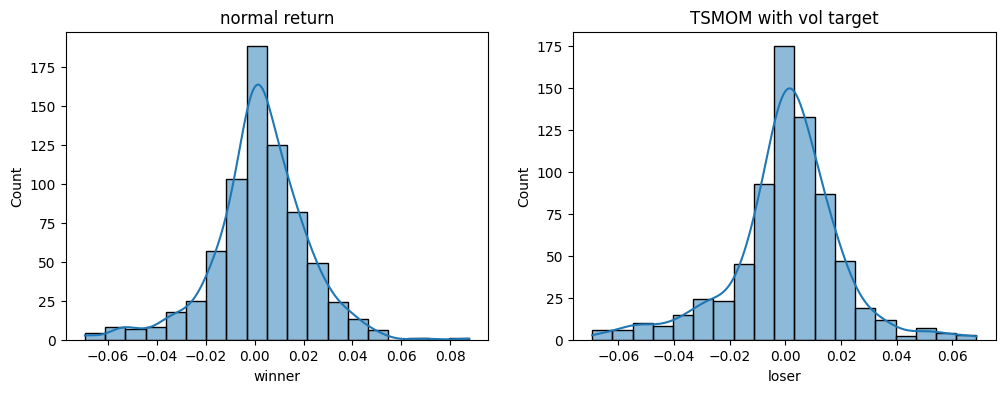

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
bins = 19
sns.histplot(ts1,bins=bins,kde=True,ax=ax1)
ax1.title.set_text('normal return')

sns.histplot(ts2,bins=bins,kde=True,ax=ax2)
ax2.title.set_text('TSMOM with vol target')

plt.show()